In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

In [2]:
c = pd.read_csv('../Data/crime_data_clean.csv', index_col='time', parse_dates=True)
c.head()

,code,description,disposition,location,patrol_zone,landmark,lat,long,year,month,...,inc_15_25,inc_25_35,inc_35_50,inc_50_75,inc_75_100,inc_100_150,inc_150_200,inc_greater_200,inc_median,inc_mean
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:36:00,7399,Miscellaneous Offenses,NaN,NONCAM,Z4,NaN,-84.403163,33.773124,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 01:55:00,7399,Miscellaneous Offenses,NaN,ONCAMRES,Z1,Center Street Apartments North,0.000000,0.000000,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 02:00:00,2308,Larceny - From Building,NaN,NONCAM,Z2,Sigma Nu Fraternity,33.775556,-84.394180,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-01 12:00:00,2204,Burglary - No Forced Entry - Residence,Unfounded,ONCAMRES,Z2,North Avenue Apartments North Building,33.771292,-84.391332,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0
2010-01-02 06:15:00,7399,Miscellaneous Offenses,NaN,ONCAM,Z2,North Avenue Apartments,-84.391332,33.771292,2010,1,...,18772.0,18419.0,21725.0,26366.0,16067.0,18490.0,8005.0,14504.0,45171.0,79299.0


In [3]:
c = c[c.year != 2018]

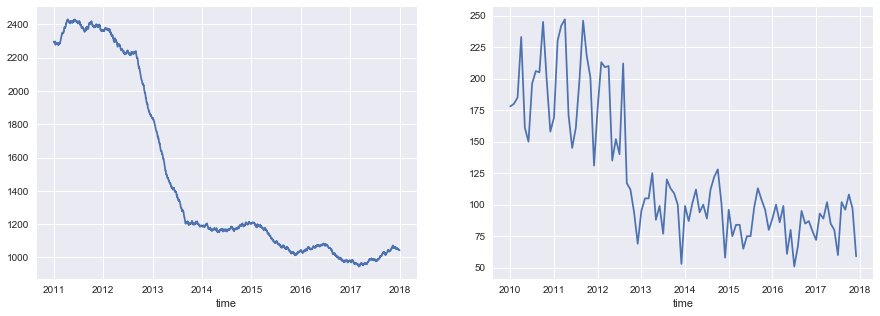

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
c.resample('D').size().rolling(365).sum().plot(ax=ax[0])
c.resample('M').size().plot(ax=ax[1])
plt.show()

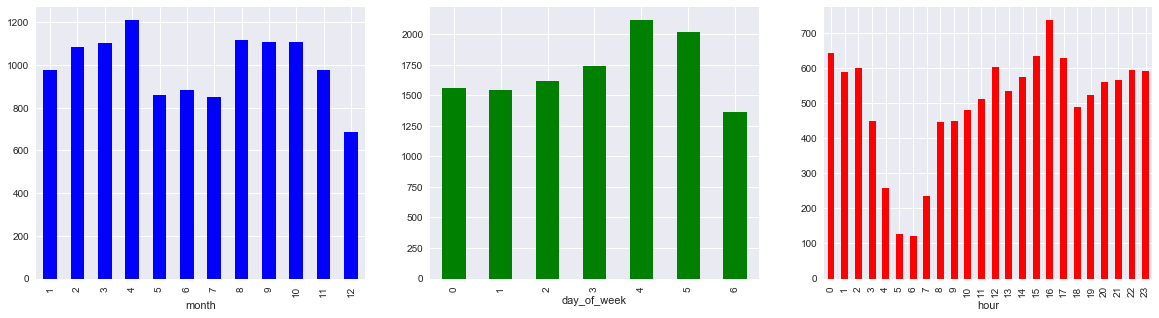

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
#c.groupby('semester').size().plot(kind='bar', ax=ax[0], color='gray')
c.groupby('month').size().plot(kind='bar', ax=ax[0], color='b')
c.groupby('day_of_week').size().plot(kind='bar', ax=ax[1], color='g')
c.groupby('hour').size().plot(kind='bar', ax=ax[2], color='r')
#c['hour'].plot(kind='hist', bins=24)
#sns.distplot(c['hour'])

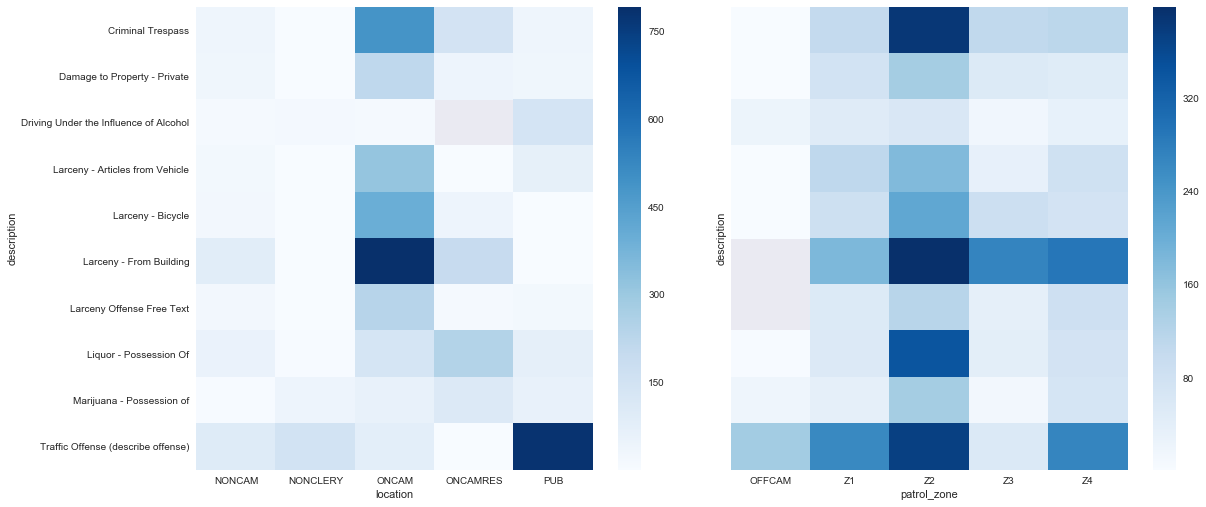

In [6]:
#includes only entries with the top 10 most frequent crimes (no miscellaneous offenses)
top_crimes_df = c[c.description.isin(c.description.value_counts()[1:11].index)]
dow_xticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#crime_month = top_crimes_df.groupby(['description', 'month']).size().unstack()
#crime_dow = top_crimes_df.groupby(['description', 'day_of_week']).size().unstack()
crime_location = top_crimes_df.groupby(['description', 'location']).size().unstack()
crime_zone = top_crimes_df.groupby(['description', 'patrol_zone']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.tight_layout()
#sns.heatmap(crime_year, cmap='Blues', ax=axes[0,0], robust=True)
#sns.heatmap(crime_month, cmap='Blues', ax=axes[0,1], robust=True, yticklabels=False)
#sns.heatmap(crime_dow, cmap='Blues', ax=axes[1,0], robust=True, xticklabels=dow_xticks)
#sns.heatmap(crime_hour, cmap='Blues', ax=axes[1,1], robust=True, yticklabels=False)
sns.heatmap(crime_location, cmap='Blues', ax=axes[0], robust=True)
sns.heatmap(crime_zone, cmap='Blues', ax=axes[1], robust=True, yticklabels=False)


plt.show()

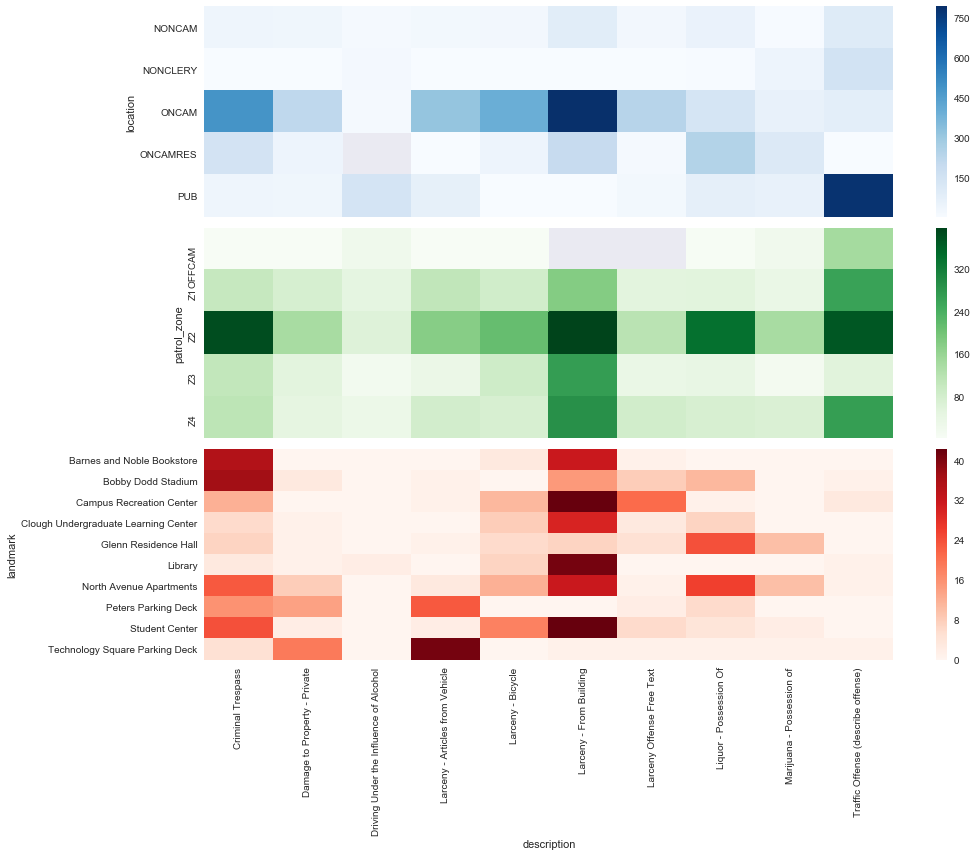

In [14]:
#includes only entries with the top 10 most frequent crimes (no miscellaneous offenses)
top_crimes_df = c[c.description.isin(c.description.value_counts()[1:11].index)]
#filters top_crimes_df further by landmark
top_landmarks_df = top_crimes_df[top_crimes_df.landmark.isin(top_crimes_df.landmark.value_counts()[:10].index)]
dow_yticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


crime_location = top_crimes_df.groupby(['location', 'description']).size().unstack()
crime_zone = top_crimes_df.groupby(['patrol_zone', 'description']).size().unstack()
crime_landmark = top_landmarks_df.groupby(['landmark', 'description']).size().unstack().fillna(0)

fig, axes = plt.subplots(3, 1, figsize=(15, 12))   
sns.heatmap(crime_location, cmap='Blues', ax=axes[0], robust=True, xticklabels=False)
sns.heatmap(crime_zone, cmap='Greens', ax=axes[1], robust=True, xticklabels=False)
sns.heatmap(crime_landmark, cmap='Reds', robust=True, ax=axes[2])
axes[0].set_xlabel('')
axes[1].set_xlabel('')
plt.tight_layout()

plt.show()

In [8]:
crime_zone

description,Criminal Trespass,Damage to Property - Private,Driving Under the Influence of Alcohol,Larceny - Articles from Vehicle,Larceny - Bicycle,Larceny - From Building,Larceny Offense Free Text,Liquor - Possession Of,Marijuana - Possession of,Traffic Offense (describe offense)
patrol_zone,,,,,,,,,,
OFFCAM,1.0,1.0,23.0,1.0,1.0,NaN,NaN,4.0,20.0,144.0
Z1,103.0,76.0,50.0,109.0,85.0,182.0,54.0,56.0,38.0,262.0
Z2,386.0,142.0,62.0,179.0,212.0,587.0,118.0,341.0,141.0,374.0
Z3,107.0,54.0,16.0,34.0,88.0,270.0,37.0,42.0,12.0,58.0
Z4,113.0,49.0,33.0,83.0,75.0,291.0,84.0,74.0,70.0,269.0


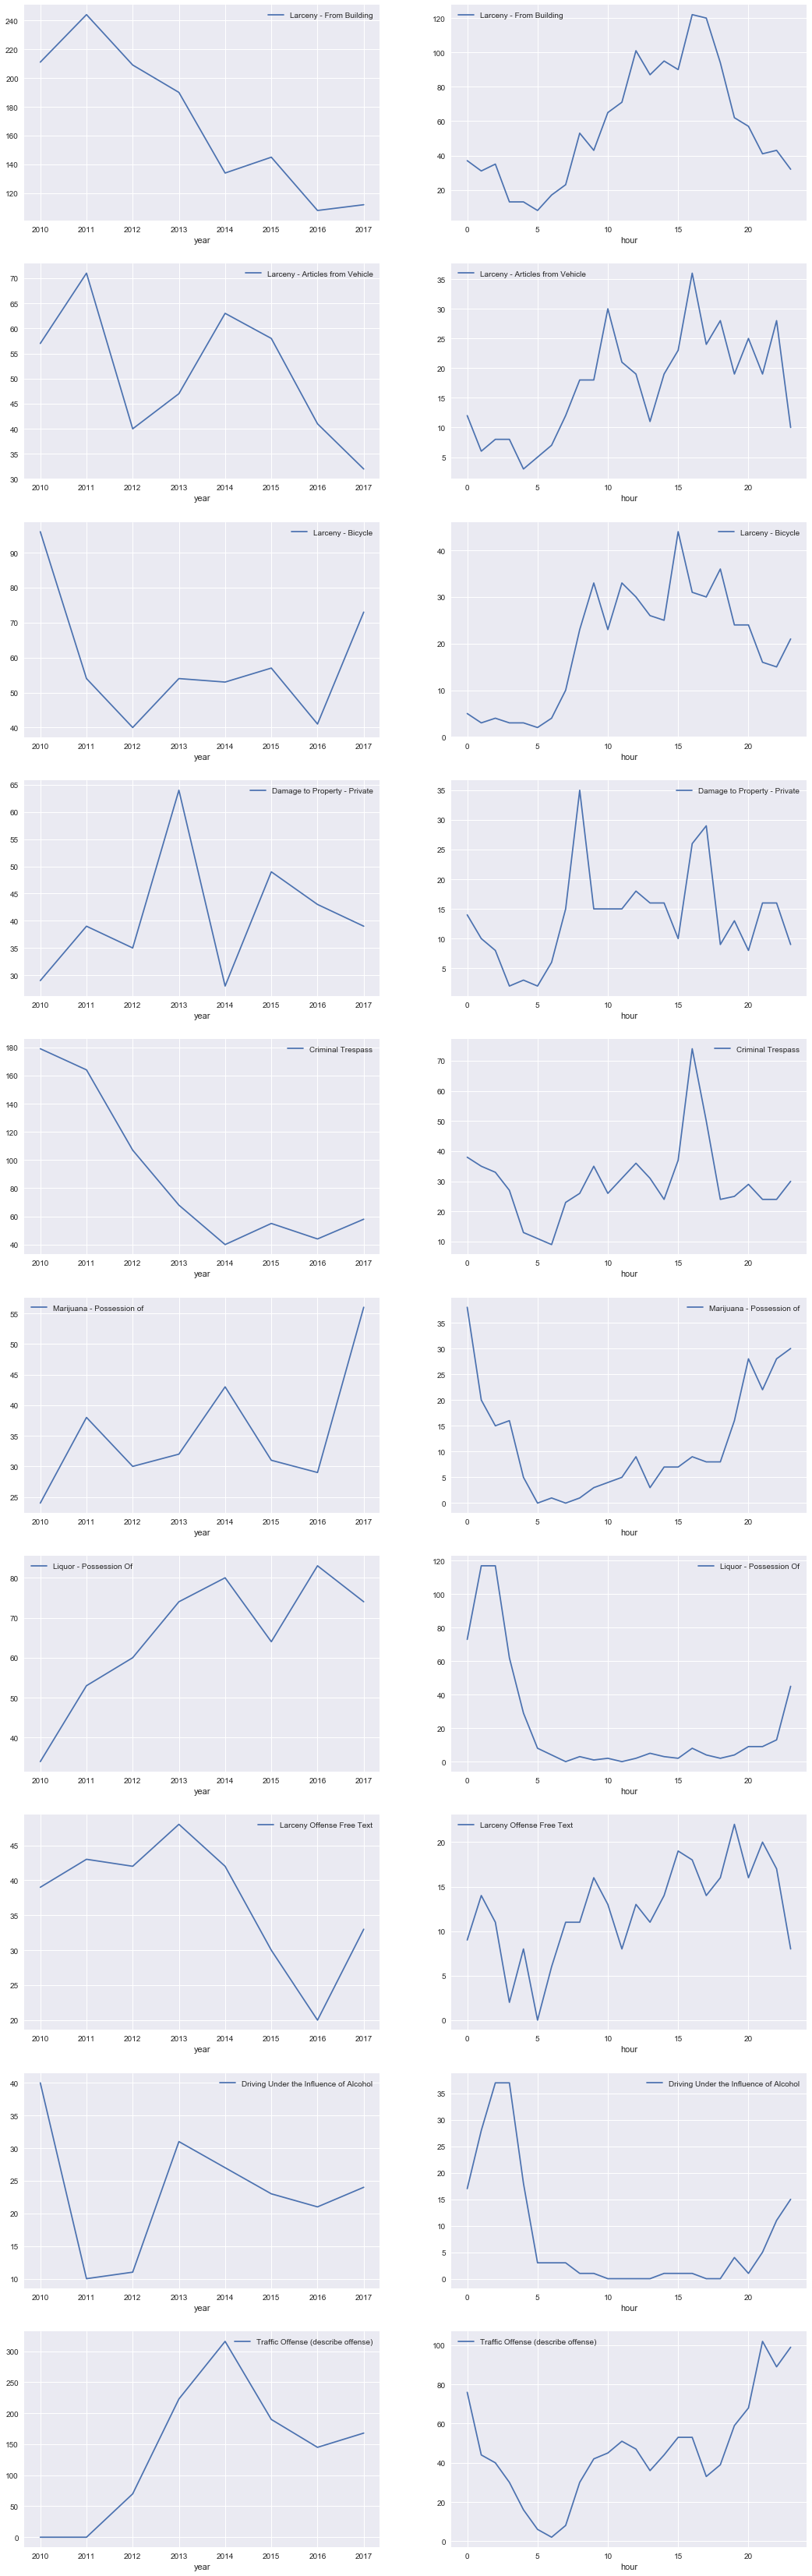

In [9]:
fig, axes = plt.subplots(10, 2, figsize=(18,60))
crime_year = top_crimes_df.groupby(['description', 'year']).size().unstack().fillna(0)
crime_hour = top_crimes_df.groupby(['description', 'hour']).size().unstack().fillna(0)

for i, crime in enumerate(top_crimes_df['description'].unique()):
    #print(crime)
    crime_year.loc[crime].plot(ax=axes[i, 0], legend=True)
    crime_hour.loc[crime].plot(ax=axes[i, 1], legend=True)
plt.show()

In [10]:
#month_year = c.groupby(['month', 'year']).size().unstack()
#dow_year = c.groupby(['day_of_week', 'year']).size().unstack()
#hour_year = c.groupby(['hour', 'year']).size().unstack()

#fig, ax = plt.subplots(1, 3, figsize=(20,6))
#sns.heatmap(month_year, cmap='Blues', ax=ax[0])
#sns.heatmap(dow_year, cmap='Blues', ax=ax[1])
#sns.heatmap(hour_year, cmap='Blues', ax=ax[2])
#plt.show()

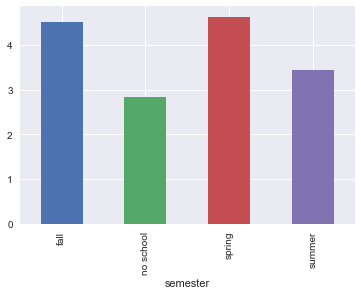

In [11]:
ranges = [c[c.semester == x]['day_of_year'].unique().size for x in sorted(c.semester.unique())]
(c.groupby('semester').size()/ranges/8).plot(kind='bar')